In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

summary_df = pd.DataFrame({"City": cities,
                         "Lat": "",
                          "Temperature": "",
                          "Humidity": "",
                          "Cloudiness": "",
                          "Wind Speed": ""
                          })


580


## Perform API Calls

In [3]:
# OpenWeatherMap Settings

settings = {"units": "imperial", "appid": api_key}

for index, row in summary_df.iterrows():
  
    try:
        current_city = summary_df["City"]
    
    
        response = owm.get_current(current_city[index], **settings)
    
        Lat = response["coord"]["lat"]
        Cloudiness = response["clouds"]["all"]
        Humidity = response["main"]["humidity"]
        Temperature = response["main"]["temp_max"]
        Wind_Speed = response["wind"]["speed"]
        
    
        summary_df.at[index, "Lat"] = Lat
        summary_df.at[index, "Cloudiness"] = Cloudiness
        summary_df.at[index, "Humidity"] = Humidity
        summary_df.at[index, "Temperature"] = Temperature
        summary_df.at[index, "Wind Speed"] = Wind_Speed
    
        print(str(index) + ": " + row["City"] + " found")
    except:
        print(f"{index}: {row['City']} not found")
        summary_df.drop(labels=index,inplace=True)  
        


summary_df.head()



0: bengkulu not found
1: severo-kurilsk found
2: portoferraio found
3: rikitea found
4: concepcion found
5: waingapu found
6: ribeira grande found
7: rio grande found
8: scicli found
9: ushuaia found
10: iqaluit found
11: nizhneyansk not found
12: cidreira found
13: yingzhong not found
14: mataura found
15: hofn found
16: lolua not found
17: shebunino found
18: georgetown found
19: torbay found
20: boddam found
21: hilo found
22: kruisfontein found
23: amapa found
24: busselton found
25: sungairaya found
26: taolanaro not found
27: victoria found
28: vaini found
29: thompson found
30: ler found
31: ancud found
32: punta arenas found
33: falam found
34: volkermarkt not found
35: waipawa found
36: emerald found
37: port elizabeth found
38: sungaipenuh found
39: madimba found
40: saldanha found
41: atuona found
42: te anau found
43: kodiak found
44: ciudad bolivar found
45: tsihombe not found
46: jamestown found
47: souillac found
48: cape town found
49: katsuura found
50: pangnirtung fou

393: mosquera found
394: chokurdakh found
395: karauzyak not found
396: marsa matruh found
397: pedernales found
398: watertown found
399: honiara found
400: huarmey found
401: agirish found
402: avera found
403: zemio found
404: hailar found
405: brooks found
406: kemise found
407: shingu found
408: lianran found
409: mount isa found
410: korem found
411: ajdabiya found
412: fortuna found
413: yagodnoye found
414: saint-pierre found
415: lukaya found
416: foz found
417: poya found
418: pawa found
419: ahipara found
420: lagos found
421: mbigou found
422: kuche not found
423: san jose found
424: velikie luki not found
425: kaeo found
426: upernavik found
427: ijaki not found
428: ilam found
429: plaster rock found
430: khandyga found
431: nanortalik found
432: steamboat springs found
433: ust-tsilma found
434: huancabamba found
435: gat found
436: kamenka found
437: itaituba found
438: maloshuyka not found
439: port-gentil found
440: ketchikan found
441: bud found
442: barcelos found
4

,City,Cloudiness,Humidity,Lat,Temperature,Wind Speed
1,severo-kurilsk,88,94,50.68,47.46,11.54
2,portoferraio,20,88,42.81,73.4,1.12
3,rikitea,80,100,-23.12,72.84,11.88
4,concepcion,36,94,9.56,76.35,1.03
5,waingapu,0,77,-9.65,73.11,7.07


In [9]:
summary_df.to_csv("output.csv")

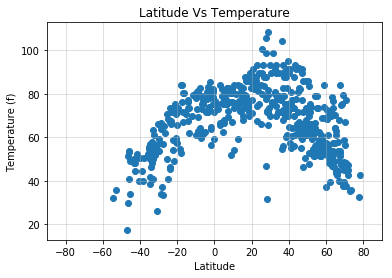

In [10]:
tempplot = plt.scatter(summary_df["Lat"], summary_df["Temperature"])
plt.title("Latitude Vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (f)")
plt.grid(alpha=.5)
plt.xlim(-90,90)
plt.savefig("temperature.png")
plt.show()


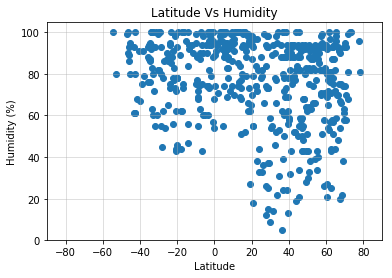

In [11]:
humidityplot = plt.scatter(summary_df["Lat"], summary_df["Humidity"])
plt.title("Latitude Vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha=.5)
plt.xlim(-90,90)
plt.savefig("humidity.png")
plt.show()


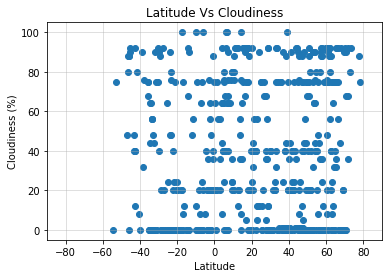

In [12]:
cloudyplot = plt.scatter(summary_df["Lat"], summary_df["Cloudiness"])
plt.title("Latitude Vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=.5)
plt.xlim(-90,90)
plt.savefig("cloudiness.png")
plt.show()


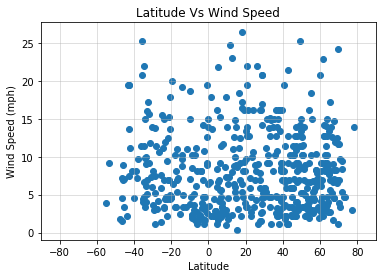

In [13]:
windyplot = plt.scatter(summary_df["Lat"], summary_df["Wind Speed"])
plt.title("Latitude Vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(alpha=.5)
plt.xlim(-90,90)
plt.savefig("windspeed.png")
plt.show()


In [8]:
print(len(summary_df))

521
